In [1]:
import cdsapi

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
c = cdsapi.Client()

In [3]:
# c.retrieve(
#     'reanalysis-era5-land',
#     {
#         'format': 'netcdf',
#         'variable':[
#             '2m_temperature','total_precipitation', 'volumetric_soil_water_layer_1',
#         ],
#         'year':'2019',
#         'month':'12',
#         'day':[
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#             '13', '14', '15',
#             '16', '17', '18',
#             '19', '20', '21',
#             '22', '23', '24',
#             '25', '26', '27',
#             '28', '29', '30',
#             '31',
#         ],
#     }, 
#     'download.nc')

2020-09-02 20:16:23,437 INFO Welcome to the CDS
2020-09-02 20:16:23,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-09-02 20:16:24,528 INFO Request is queued
2020-09-02 20:16:27,329 INFO Request is running
2020-09-02 20:17:40,754 INFO Request is completed
2020-09-02 20:17:40,755 INFO Downloading http://136.156.133.46/cache-compute-0015/cache/data4/adaptor.mars.internal-1599057987.4776475-14712-20-d6bf919f-5d56-4f87-9e9d-68f1b9034106.nc to download.nc (1.1G)
2020-09-02 20:22:14,747 INFO Download rate 4.2M/s     


Result(content_length=1205972896,content_type=application/x-netcdf,location=http://136.156.133.46/cache-compute-0015/cache/data4/adaptor.mars.internal-1599057987.4776475-14712-20-d6bf919f-5d56-4f87-9e9d-68f1b9034106.nc)

In [3]:
ds = xr.open_dataset('download.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-02 14:47:01 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

# Exploring and Visualising Geospatial Data

## Calculating Basic Statistics

### Temperature of air at 2m above the surface

In [5]:
ds.t2m

<xarray.DataArray 't2m' (time: 31, latitude: 1801, longitude: 3600)>
[200991600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [6]:
ds.t2m.min()

<xarray.DataArray 't2m' ()>
array(221.28519, dtype=float32)

In [7]:
ds.t2m.max()

<xarray.DataArray 't2m' ()>
array(317.77365, dtype=float32)

In [8]:
ds.t2m.mean()

<xarray.DataArray 't2m' ()>
array(268.24347, dtype=float32)

In [9]:
ds.t2m.median()

<xarray.DataArray 't2m' ()>
array(264.078, dtype=float32)

In [10]:
ds.t2m.std()

<xarray.DataArray 't2m' ()>
array(21.81747, dtype=float32)

In [11]:
ds.t2m.var()

<xarray.DataArray 't2m' ()>
array(476.00198, dtype=float32)

### Total Precipitation

In [12]:
ds.tp

<xarray.DataArray 'tp' (time: 31, latitude: 1801, longitude: 3600)>
[200991600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    units:      m
    long_name:  Total precipitation

In [13]:
ds.tp.min()

<xarray.DataArray 'tp' ()>
array(7.450581e-09, dtype=float32)

In [14]:
ds.tp.max()

<xarray.DataArray 'tp' ()>
array(0.21889278, dtype=float32)

In [15]:
ds.tp.mean()

<xarray.DataArray 'tp' ()>
array(0.00069312, dtype=float32)

In [16]:
ds.tp.median()

<xarray.DataArray 'tp' ()>
array(1.6704202e-05, dtype=float32)

In [17]:
ds.tp.std()

<xarray.DataArray 'tp' ()>
array(0.0025754, dtype=float32)

In [18]:
ds.tp.var()

<xarray.DataArray 'tp' ()>
array(6.632711e-06, dtype=float32)

### Volumetric soil water layer 1

In [19]:
ds.swvl1

<xarray.DataArray 'swvl1' (time: 31, latitude: 1801, longitude: 3600)>
[200991600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    units:      m**3 m**-3
    long_name:  Volumetric soil water layer 1

In [20]:
ds.swvl1.min()

<xarray.DataArray 'swvl1' ()>
array(0., dtype=float32)

In [21]:
ds.swvl1.max()

<xarray.DataArray 'swvl1' ()>
array(0.76600647, dtype=float32)

In [22]:
ds.swvl1.mean()

<xarray.DataArray 'swvl1' ()>
array(0.2649494, dtype=float32)

In [23]:
ds.swvl1.median()

<xarray.DataArray 'swvl1' ()>
array(0.2716025, dtype=float32)

In [24]:
ds.swvl1.std()

<xarray.DataArray 'swvl1' ()>
array(0.13019994, dtype=float32)

In [25]:
ds.swvl1.var()

<xarray.DataArray 'swvl1' ()>
array(0.01695202, dtype=float32)

## Checking for missing values

In [26]:
ds.isnull().count()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      int32 200991600
    tp       int32 200991600
    swvl1    int32 200991600

## Plotting data

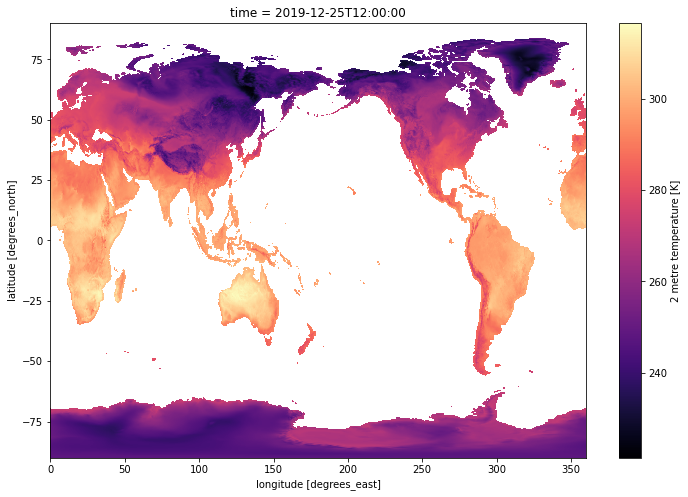

In [27]:
ds.t2m.sel(time='2019-12-25').plot(cmap='magma')

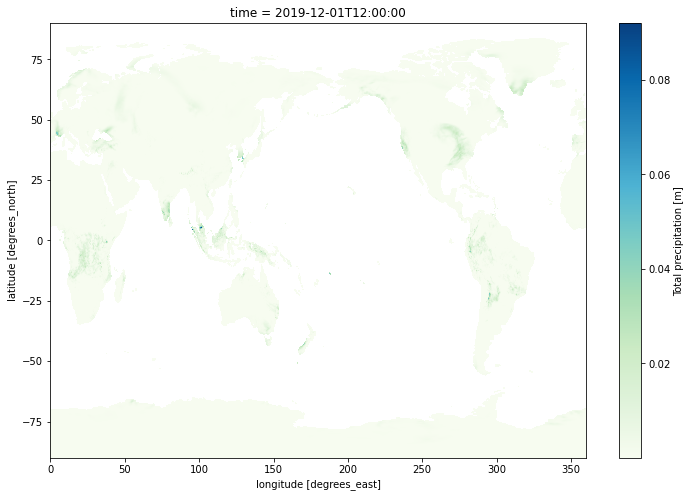

In [53]:
ds.tp.sel(time='2019-12-01').plot(cmap='GnBu')

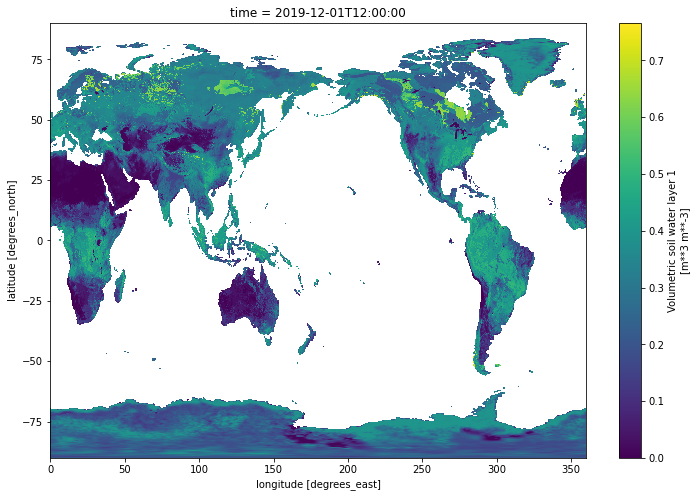

In [57]:
ds.swvl1.sel(time='2019-12-01').plot()

## Visualising data distribution

(array([  321574.,  3954441., 14419857., 10647769., 10623027.,  6757909.,
         4377244.,  8346348.,  8174480.,   976104.]),
 array([221.28519, 230.93404, 240.58289, 250.23172, 259.88058, 269.52942,
        279.17825, 288.82712, 298.47595, 308.12482, 317.77365],
       dtype=float32),
 <BarContainer object of 10 artists>)

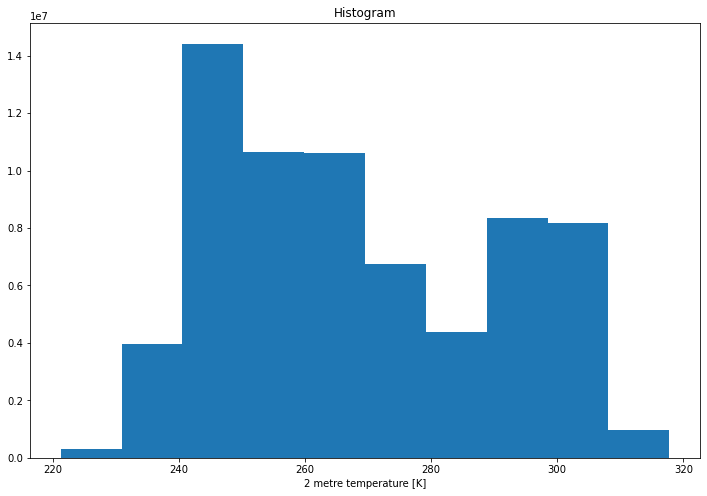

In [43]:
ds.t2m.plot()

(array([6.8436371e+07, 1.4117100e+05, 1.5473000e+04, 3.8770000e+03,
        1.1820000e+03, 4.5600000e+02, 1.6200000e+02, 5.2000000e+01,
        7.0000000e+00, 2.0000000e+00]),
 array([7.4505806e-09, 2.1889284e-02, 4.3778561e-02, 6.5667838e-02,
        8.7557115e-02, 1.0944639e-01, 1.3133568e-01, 1.5322495e-01,
        1.7511423e-01, 1.9700350e-01, 2.1889278e-01], dtype=float32),
 <BarContainer object of 10 artists>)

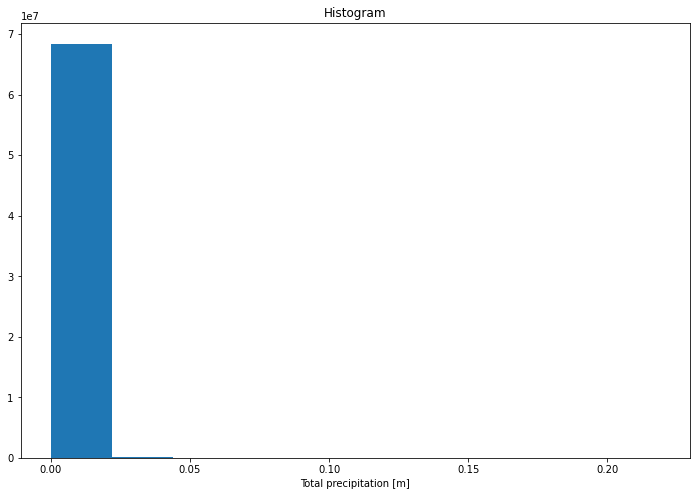

In [44]:
ds.tp.plot()

(array([ 7662084.,  4145751., 14999080., 12867079., 16728351.,  8844565.,
         2057516.,   700088.,   566021.,    28218.]),
 array([0.        , 0.07660065, 0.1532013 , 0.22980194, 0.3064026 ,
        0.38300323, 0.45960388, 0.5362045 , 0.6128052 , 0.6894058 ,
        0.76600647], dtype=float32),
 <BarContainer object of 10 artists>)

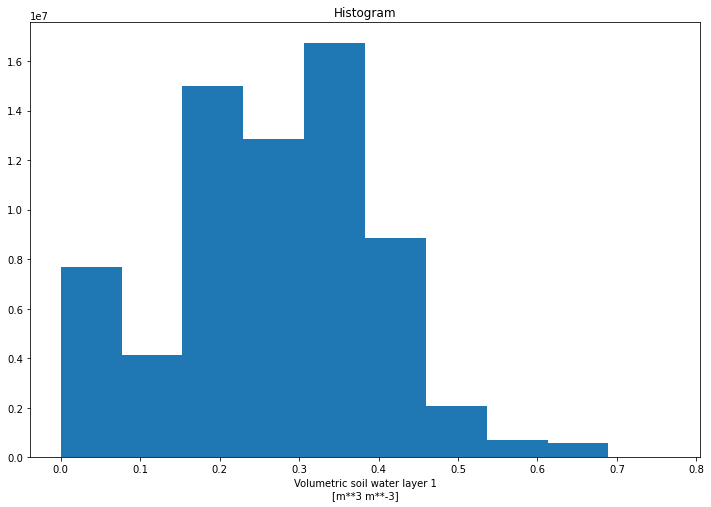

In [58]:
ds.swvl1.plot()